******The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.******

1. le chargement des donnees
2. preprocessing and cleaning the data


In [8]:
import pandas as pd

survived = pd.read_csv("C:\\Users\\PC.DESKTOP-QK1F62J\\Downloads\\Preparation_Data_science\\projet_Titanic\\gender_submission.csv")
df = pd.read_csv("C:\\Users\\PC.DESKTOP-QK1F62J\\Downloads\\Preparation_Data_science\\projet_Titanic\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.shape

(891, 12)

In [10]:
df.info() # afin de savoir est-ce qu'on a des valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# df = df.dropna(subset = ["Age" , "Cabin" , "Embarked"])   #suppression des lignes avec des valeurs manquantes

df.drop("Cabin", axis=1 , inplace=True) #c'est irrelevant 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
df = df.dropna(subset = ["Embarked"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


C:\Users\PC.DESKTOP-QK1F62J\AppData\Local\Temp\ipykernel_2864\1530478703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].fillna(df["Age"].mean())


In [19]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
df["Embarked"] = df["Embarked"].map({"S":"0","C":"1","Q":"2"})
df["Sex"] = df["Sex"].map({"male":0 , "female":1})
df.head(3)

C:\Users\PC.DESKTOP-QK1F62J\AppData\Local\Temp\ipykernel_2864\1728329911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"] = df["Embarked"].map({"S":"0","C":"1","Q":"2"})
C:\Users\PC.DESKTOP-QK1F62J\AppData\Local\Temp\ipykernel_2864\1728329911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].map({"male":0 , "female":1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0


**Data Visualization**

In [17]:
import seaborn as sns

# sns.countplot()

<Axes: xlabel='Survived', ylabel='count'>

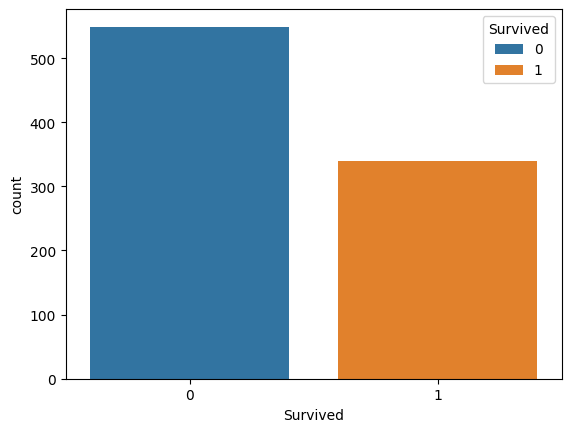

In [21]:
# sns.set()
# sns.countplot(df["Survived"])
sns.countplot(data=df, x="Survived" , hue="Survived")

**=> cad la plupart n'ont pas survecu**

<Axes: xlabel='Survived', ylabel='count'>

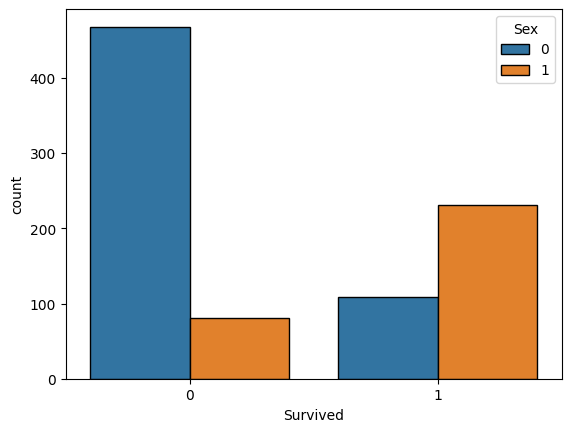

In [24]:
sns.countplot(data=df, hue="Sex", x="Survived" , hue_order=[0, 1] , edgecolor="black")


**la plupart des gens sur la titanic se sont des males  mais malgre ca les females sont celles qui sont survecu le plus**

<Axes: xlabel='Survived', ylabel='count'>

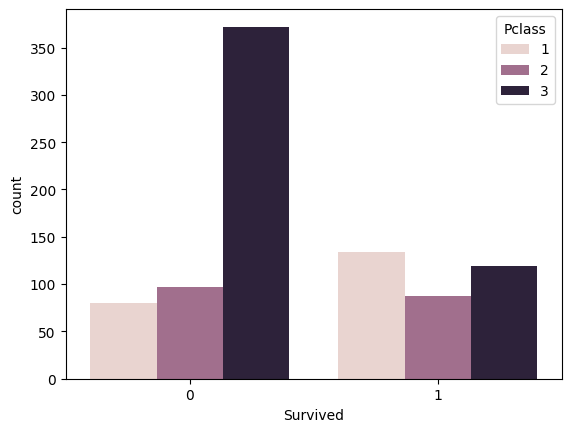

In [25]:
sns.countplot(data=df , x="Survived"  , hue="Pclass")  # classe du ticket(1ere classe ,2eme,3eme)

**1ere classe ==> plus de chance a survivre**

In [134]:
# df["Embarked"] = df["Embarked"].map({"S":"0","C":"1","Q":"2"})
# df["Sex"] = df["Sex"].map({"male":0 , "female":1})
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0


**Model Logistic Regression**

In [136]:
features = df[[ "Pclass" ,  "Sex" , "Age" , "SibSp" , "Parch" , "Fare" ,"Embarked" ]]
target = df["Survived"]

# target

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


x_train , x_test , y_train, y_test = train_test_split(features , target , test_size=0.2 ,random_state=42)

modele = LogisticRegression()
modele.fit(x_train , y_train)

y_pred = modele.predict(x_test)
print("l'accuracy:  " ,accuracy_score(y_test , y_pred))


l'accuracy:   0.7865168539325843
